# Author: Kajal Lalwani

### Task 1: Predict the percentage of an student based on the number of study hours

In this regression task i tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [29]:
#Importing the libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Step1 : Read data from source

In [30]:
# Reading data from source
url="http://bit.ly/w-data"
s_data=pd.read_csv(url)
print("Data imported succesfully")
s_data.head(10)

Data imported succesfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Step2 : Plotting the distribution of scores

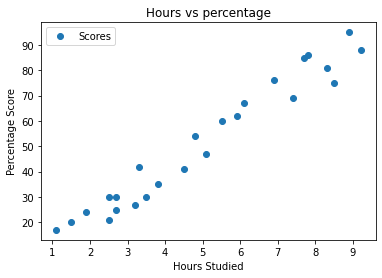

In [19]:
# Plotting the distribution of scores
s_data.plot(x='Hours' , y='Scores', style='o')
plt.title("Hours vs percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score

### Step3 : Preparing the data
#### The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [20]:
#Preparing the data
X=s_data.iloc[:,:-1].values
y=s_data.iloc[:,1].values

### Step4 : Spliting the data into training and test sets
#### The next step is to split this data into training and test sets.

In [21]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### Step5 : Training the Algorithm
#### Now i have split the data into training and testing sets, and now is finally the time to train our algorithm.

In [28]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)
print("Training complete")

Training complete


### Step6 : Plotting the regression line
#### As our model is trained now, the next step is to visualize the best-fit line of regression 

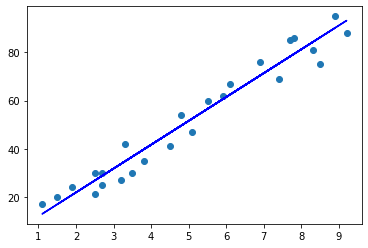

In [23]:
# Plotting the regression line
line=reg.coef_*X+reg.intercept_
plt.scatter(X,y)
plt.plot(X,line, color='blue')
plt.show()

### Step7 : Making Predictions
#### Now that we have trained our algorithm, it's time to make some predictions.

In [24]:
# Testing data - In Hours
print(X_test)
# Predicting the scores
y_pred=reg.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step8 :  Comparing Actual result to Predicted result

In [25]:
# Comparing Actual vs Predicted
df=pd.DataFrame({'Actual':y_test, 'Predict':y_pred})
df

,Actual,Predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
# You can also test with your own data
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
own_pred = reg.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


### Step8 : Evaluating the model
#### The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics

In [27]:
from sklearn import metrics 
print('Mean absolute error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test, y_pred))

Mean absolute error: 4.183859899002975
Mean Squared error: 21.5987693072174
